In [ ]:
import pandas as pd
import seaborn as sns

# Load from seaborn (Boston dataset is not directly available, you may use a preloaded CSV or upload it)
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


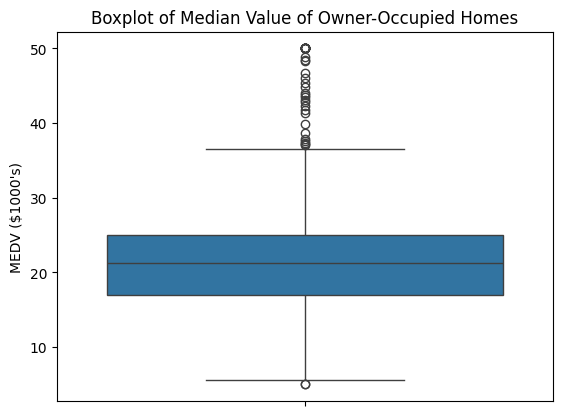

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y='medv', data=df)
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("MEDV ($1000's)")
plt.show()


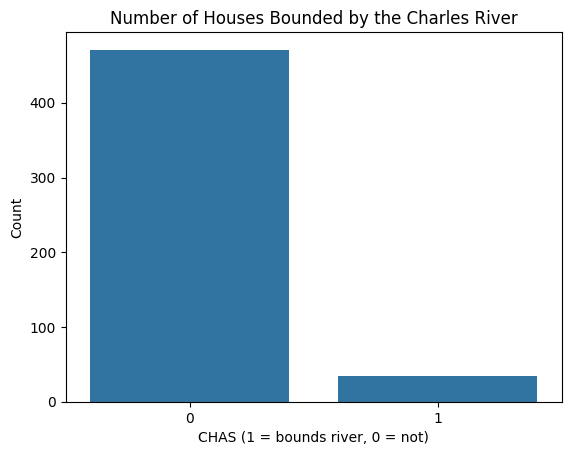

In [ ]:
sns.countplot(x='chas', data=df)
plt.title("Number of Houses Bounded by the Charles River")
plt.xlabel("CHAS (1 = bounds river, 0 = not)")
plt.ylabel("Count")
plt.show()


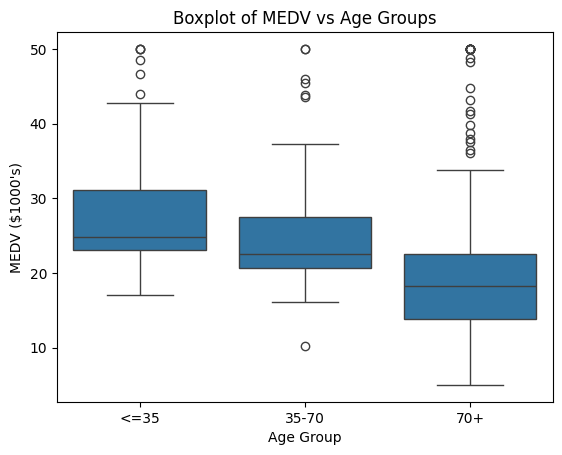

In [ ]:
bins = [0, 35, 70, 100]
labels = ['<=35', '35-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

sns.boxplot(x='age_group', y='medv', data=df)
plt.title("Boxplot of MEDV vs Age Groups")
plt.xlabel("Age Group")
plt.ylabel("MEDV ($1000's)")
plt.show()


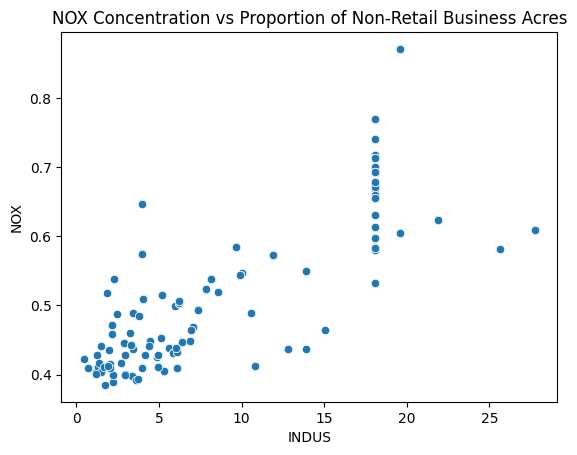

In [ ]:
sns.scatterplot(x='indus', y='nox', data=df)
plt.title("NOX Concentration vs Proportion of Non-Retail Business Acres")
plt.xlabel("INDUS")
plt.ylabel("NOX")
plt.show()


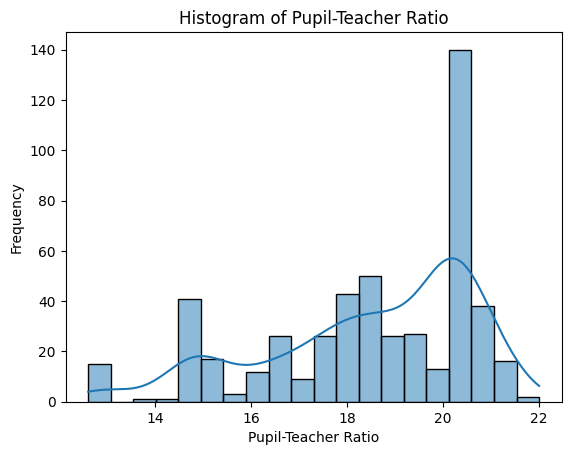

In [ ]:
sns.histplot(df['ptratio'], bins=20, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

medv_river = df[df['chas'] == 1]['medv']
medv_no_river = df[df['chas'] == 0]['medv']

t_stat, p_val = ttest_ind(medv_river, medv_no_river)
print("T-Statistic:", t_stat, "P-Value:", p_val)


T-Statistic: 3.996437466090509 P-Value: 7.390623170519905e-05


In [ ]:
from scipy.stats import f_oneway

group1 = df[df['age_group'] == '<=35']['medv']
group2 = df[df['age_group'] == '35-70']['medv']
group3 = df[df['age_group'] == '70+']['medv']

f_stat, p_val = f_oneway(group1, group2, group3)
print("F-Statistic:", f_stat, "P-Value:", p_val)


F-Statistic: 36.40764999196598 P-Value: 1.7105011022702984e-15


In [ ]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['nox'], df['indus'])
print("Pearson Correlation:", corr, "P-Value:", p_val)


Pearson Correlation: 0.7636514469209154 P-Value: 7.913361061239639e-98


In [ ]:
import statsmodels.api as sm

X = df[['dis']]
X = sm.add_constant(X)
y = df['medv']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        20:57:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0